# Ecommerce-pricing-analytics

In [20]:
import pandas as pd
import sqlite3

# ---------------------------
# 1. Load CSVs into Pandas

In [21]:
orders = pd.read_csv("List of Orders.csv", encoding="unicode_escape")
order_details = pd.read_csv("Order Details.csv", encoding="unicode_escape")
sales_target = pd.read_csv("Sales target.csv", encoding="unicode_escape")

In [22]:
print("✅ CSVs Loaded Successfully")
print("Orders:", orders.shape)
print("Order Details:", order_details.shape)
print("Sales Target:", sales_target.shape)

✅ CSVs Loaded Successfully
Orders: (560, 5)
Order Details: (1500, 6)
Sales Target: (36, 3)


# ---------------------------
# 2. Create SQLite connection


In [23]:
conn = sqlite3.connect("ecommerce.db")  # Creates file ecommerce.db in repo

# ---------------------------
# 3. Save Pandas DataFrames as SQL Tables


In [24]:
orders.to_sql("orders", conn, if_exists="replace", index=False)
order_details.to_sql("order_details", conn, if_exists="replace", index=False)
sales_target.to_sql("sales_target", conn, if_exists="replace", index=False)

print("✅ Data Saved into SQLite Database")

✅ Data Saved into SQLite Database


# ---------------------------
# 4. Check the table structure of orders


In [25]:
import pandas as pd

# Show first 5 rows of orders
print("Orders table preview:")
print(pd.read_sql("SELECT * FROM orders LIMIT 5;", conn))


Orders table preview:
  Order ID  Order Date CustomerName           State       City
0  B-25601  01-04-2018       Bharat         Gujarat  Ahmedabad
1  B-25602  01-04-2018        Pearl     Maharashtra       Pune
2  B-25603  03-04-2018        Jahan  Madhya Pradesh     Bhopal
3  B-25604  03-04-2018       Divsha       Rajasthan     Jaipur
4  B-25605  05-04-2018      Kasheen     West Bengal    Kolkata


# ---------------------------
# 5. list all columns (with names & types)


In [26]:
# Preview the order_details table
pd.read_sql("PRAGMA table_info(order_details);", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,Order ID,TEXT,0,None,0
1,1,Amount,REAL,0,None,0
2,2,Profit,REAL,0,None,0
3,3,Quantity,INTEGER,0,None,0
4,4,Category,TEXT,0,None,0
5,5,Sub-Category,TEXT,0,None,0


# ---------------------------
# 6. Top 10 States by Revenue


In [27]:
query = """
SELECT o.State, SUM(od.Amount) AS TotalRevenue
FROM orders o
JOIN order_details od ON o."Order ID" = od."Order ID"
GROUP BY o.State
ORDER BY TotalRevenue DESC
LIMIT 10;
"""
result = pd.read_sql(query, conn)
print("Top 10 States by Revenue:")
print(result)


Top 10 States by Revenue:
            State  TotalRevenue
0  Madhya Pradesh      105140.0
1     Maharashtra       95348.0
2           Delhi       22531.0
3   Uttar Pradesh       22359.0
4       Rajasthan       21149.0
5         Gujarat       21058.0
6          Punjab       16786.0
7       Karnataka       15058.0
8     West Bengal       14086.0
9         Kerala        13459.0


# ---------------------------
# 7. Top 10 Products by Revenue


In [28]:
query = """
SELECT od."Sub-Category", SUM(od.Amount) AS TotalRevenue
FROM order_details od
GROUP BY od."Sub-Category"
ORDER BY TotalRevenue DESC
LIMIT 10;
"""
print(pd.read_sql(query, conn))


       Sub-Category  TotalRevenue
0          Printers       58252.0
1         Bookcases       56861.0
2             Saree       53511.0
3            Phones       46119.0
4  Electronic Games       39168.0
5            Chairs       34222.0
6          Trousers       30039.0
7            Tables       22614.0
8       Accessories       21728.0
9             Stole       18546.0


# ---------------------------
# 8. Profit by State


In [29]:
query = """
SELECT o.State, SUM(od.Profit) AS TotalProfit
FROM orders o
JOIN order_details od ON o."Order ID" = od."Order ID"
GROUP BY o.State
ORDER BY TotalProfit DESC
LIMIT 10;
"""
print(pd.read_sql(query, conn))


              State  TotalProfit
0       Maharashtra       6176.0
1    Madhya Pradesh       5551.0
2     Uttar Pradesh       3237.0
3             Delhi       2987.0
4       West Bengal       2500.0
5           Kerala        1871.0
6           Haryana       1325.0
7         Rajasthan       1257.0
8  Himachal Pradesh        656.0
9         Karnataka        645.0


In [39]:
query = """
SELECT od."Category", SUM(od.Amount) AS TotalRevenue
FROM order_details od 
GROUP BY od."Category"
ORDER BY TotalRevenue DESC
LIMIT 10;
"""
result = pd.read_sql(query, conn)
print("Top 10 Categories by Revenue:")
print(result)


Top 10 Categories by Revenue:
      Category  TotalRevenue
0  Electronics      165267.0
1     Clothing      139054.0
2    Furniture      127181.0


In [41]:
query = """
SELECT od."Sub-Category", SUM(od.Amount) AS TotalRevenue
FROM order_details od
GROUP BY od."Sub-Category"
ORDER BY TotalRevenue DESC
LIMIT 10;
"""
result = pd.read_sql(query, conn)
print("Top 10 Sub-Categories by Revenue:")
print(result)


Top 10 Sub-Categories by Revenue:
       Sub-Category  TotalRevenue
0          Printers       58252.0
1         Bookcases       56861.0
2             Saree       53511.0
3            Phones       46119.0
4  Electronic Games       39168.0
5            Chairs       34222.0
6          Trousers       30039.0
7            Tables       22614.0
8       Accessories       21728.0
9             Stole       18546.0


In [46]:
query = """
SELECT od."Category", SUM(od.Profit) AS TotalProfit
FROM order_details od
GROUP BY od."Category"
ORDER BY TotalProfit DESC
LIMIT 10;
"""
result = pd.read_sql(query, conn)
print("Top 10 Categories by Profit:")
print(result)


Top 10 Categories by Profit:
      Category  TotalProfit
0     Clothing      11163.0
1  Electronics      10494.0
2    Furniture       2298.0


In [47]:
query = """
SELECT od."Sub-Category", SUM(od.Profit) AS TotalProfit
FROM order_details od
GROUP BY od."Sub-Category"
ORDER BY TotalProfit DESC
LIMIT 10;
"""
result = pd.read_sql(query, conn)
print("Top 10 Sub-Categories by Profit:")
print(result)


Top 10 Sub-Categories by Profit:
  Sub-Category  TotalProfit
0     Printers       5964.0
1    Bookcases       4888.0
2  Accessories       3559.0
3     Trousers       2847.0
4        Stole       2559.0
5       Phones       2207.0
6  Hankerchief       2098.0
7      T-shirt       1500.0
8        Shirt       1131.0
9  Furnishings        844.0


In [48]:
query = """
SELECT od."Sub-Category", SUM(od.Quantity) AS TotalQuantity
FROM order_details od
GROUP BY od."Sub-Category"
ORDER BY TotalQuantity DESC
LIMIT 10;
"""
result = pd.read_sql(query, conn)
print("Top 10 Sub-Categories by Quantity Sold:")
print(result)


Top 10 Sub-Categories by Quantity Sold:
       Sub-Category  TotalQuantity
0             Saree            782
1       Hankerchief            754
2             Stole            671
3       Furnishings            310
4           T-shirt            305
5            Phones            304
6  Electronic Games            297
7         Bookcases            297
8          Printers            291
9            Chairs            277


In [50]:
query = """
SELECT od."Sub-Category",
       SUM(od.Amount) AS TotalRevenue,
       SUM(od.Profit) AS TotalProfit,
       ROUND(SUM(od.Profit) * 1.0 / SUM(od.Amount), 2) AS ProfitMargin
FROM order_details od
GROUP BY od."Sub-Category"
ORDER BY ProfitMargin DESC
LIMIT 10;
"""
result = pd.read_sql(query, conn)
print("Top 10 Sub-Categories by Profit Margin:")
print(result)


Top 10 Sub-Categories by Profit Margin:
  Sub-Category  TotalRevenue  TotalProfit  ProfitMargin
0      T-shirt        7382.0       1500.0          0.20
1  Accessories       21728.0       3559.0          0.16
2        Shirt        7555.0       1131.0          0.15
3        Stole       18546.0       2559.0          0.14
4  Hankerchief       14608.0       2098.0          0.14
5        Skirt        1946.0        235.0          0.12
6     Leggings        2106.0        260.0          0.12
7     Printers       58252.0       5964.0          0.10
8     Trousers       30039.0       2847.0          0.09
9    Bookcases       56861.0       4888.0          0.09


/tmp/ipykernel_16881/1768134561.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TotalProfit", y="Sub-Category", data=df_profit, palette="viridis")


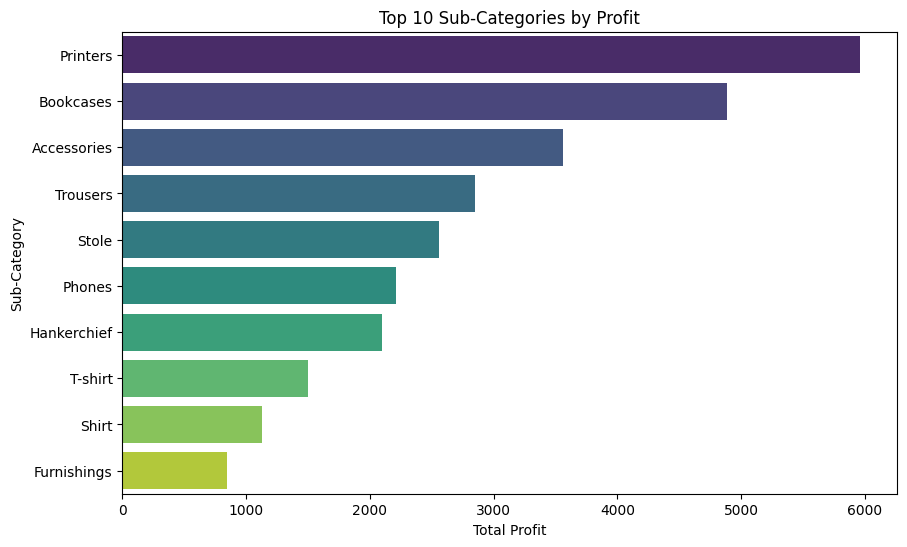

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

query = """
SELECT od."Sub-Category", SUM(od.Profit) AS TotalProfit
FROM order_details od
GROUP BY od."Sub-Category"
ORDER BY TotalProfit DESC
LIMIT 10;
"""
df_profit = pd.read_sql(query, conn)

plt.figure(figsize=(10,6))
sns.barplot(x="TotalProfit", y="Sub-Category", data=df_profit, palette="viridis")
plt.title("Top 10 Sub-Categories by Profit")
plt.xlabel("Total Profit")
plt.ylabel("Sub-Category")
plt.show()


/tmp/ipykernel_16881/1869181707.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TotalQuantity", y="Sub-Category", data=df_qty, palette="magma")


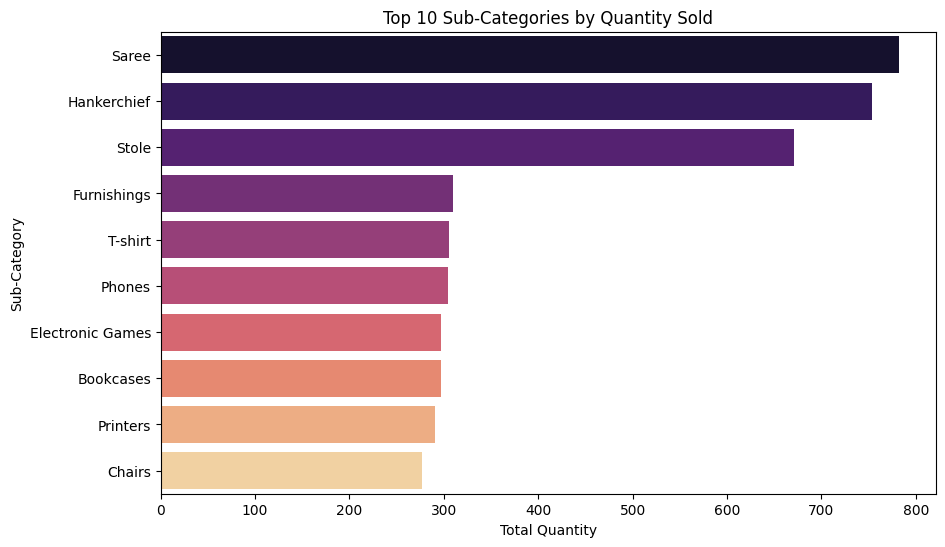

In [53]:
query = """
SELECT od."Sub-Category", SUM(od.Quantity) AS TotalQuantity
FROM order_details od
GROUP BY od."Sub-Category"
ORDER BY TotalQuantity DESC
LIMIT 10;
"""
df_qty = pd.read_sql(query, conn)

plt.figure(figsize=(10,6))
sns.barplot(x="TotalQuantity", y="Sub-Category", data=df_qty, palette="magma")
plt.title("Top 10 Sub-Categories by Quantity Sold")
plt.xlabel("Total Quantity")
plt.ylabel("Sub-Category")
plt.show()


/tmp/ipykernel_16881/2725374069.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="ProfitMargin", y="Sub-Category", data=df_margin, palette="coolwarm")


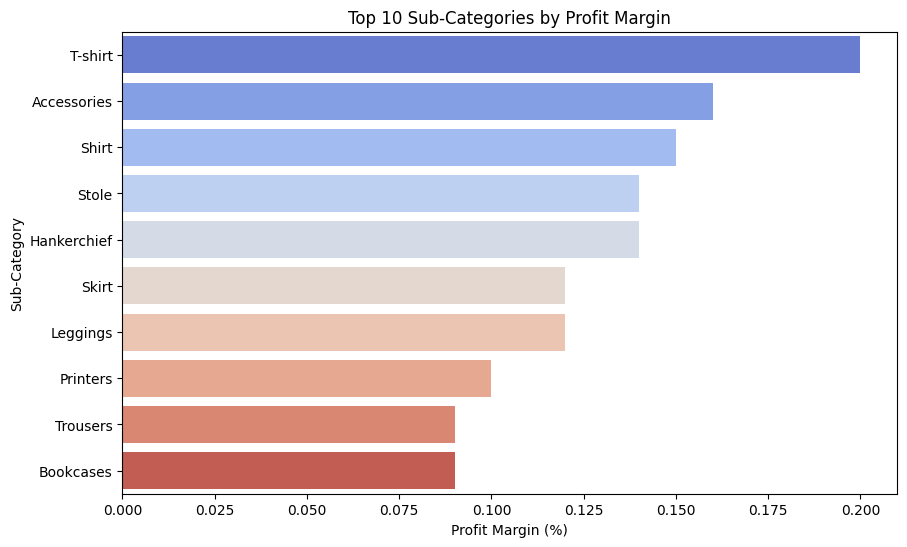

In [54]:
query = """
SELECT od."Sub-Category",
       SUM(od.Amount) AS TotalRevenue,
       SUM(od.Profit) AS TotalProfit,
       ROUND(SUM(od.Profit) * 1.0 / SUM(od.Amount), 2) AS ProfitMargin
FROM order_details od
GROUP BY od."Sub-Category"
ORDER BY ProfitMargin DESC
LIMIT 10;
"""
df_margin = pd.read_sql(query, conn)

plt.figure(figsize=(10,6))
sns.barplot(x="ProfitMargin", y="Sub-Category", data=df_margin, palette="coolwarm")
plt.title("Top 10 Sub-Categories by Profit Margin")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Sub-Category")
plt.show()


/tmp/ipykernel_16881/395671087.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TotalProfit", y="Sub-Category", data=df_profit, palette="viridis", ax=axes[0])
/tmp/ipykernel_16881/395671087.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TotalQuantity", y="Sub-Category", data=df_qty, palette="magma", ax=axes[1])
/tmp/ipykernel_16881/395671087.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="ProfitMargin", y="Sub-Category", data=df_margin, palette="coolwarm", ax=axes[2])


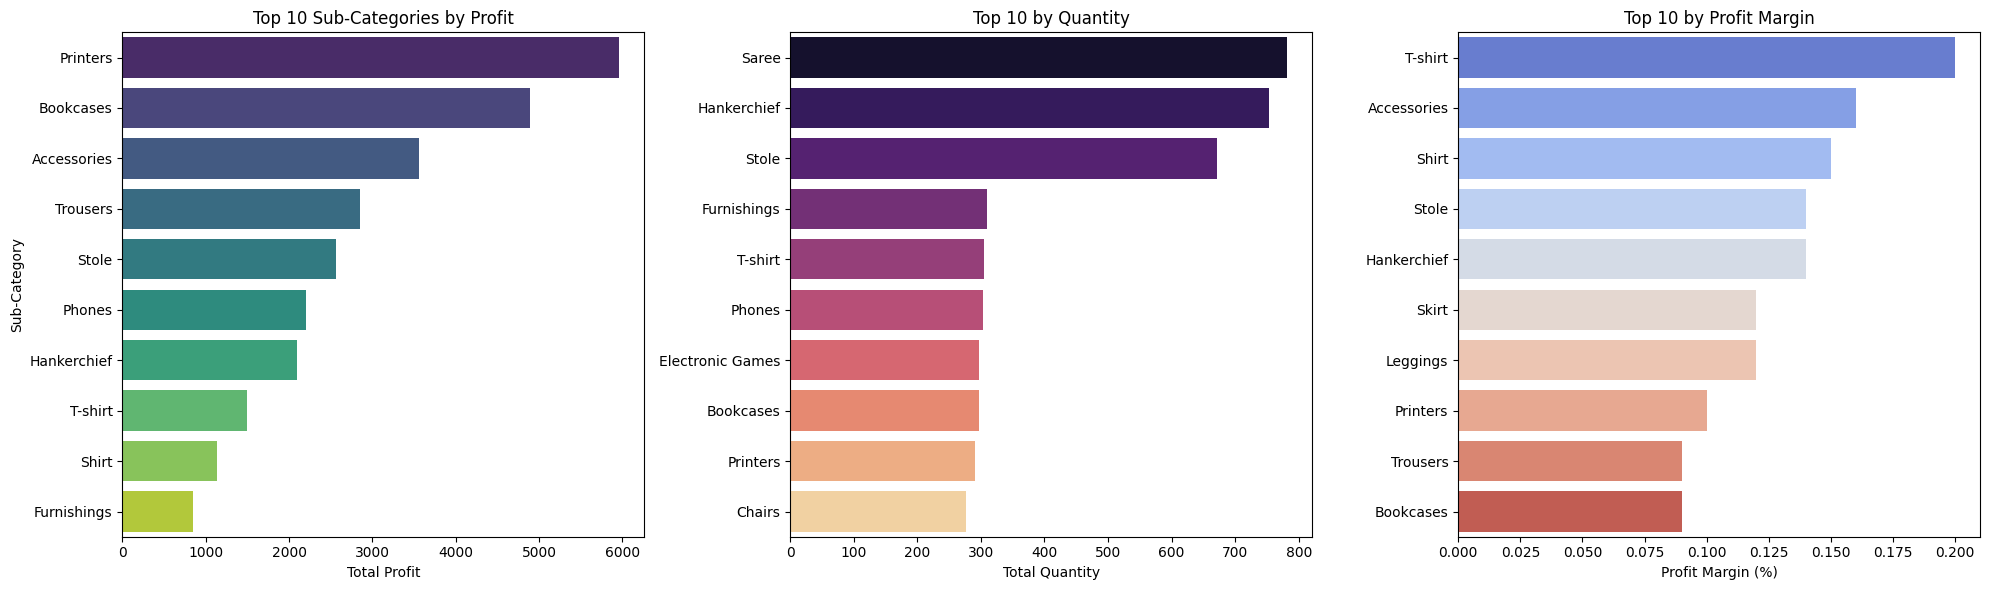

In [66]:
# Create 1 row, 3 columns grid (3 plots side by side)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# ---------- 1. Profit Analysis ----------
query = """
SELECT od."Sub-Category", SUM(od.Profit) AS TotalProfit
FROM order_details od
GROUP BY od."Sub-Category"
ORDER BY TotalProfit DESC
LIMIT 10;
"""
df_profit = pd.read_sql(query, conn)

sns.barplot(x="TotalProfit", y="Sub-Category", data=df_profit, palette="viridis", ax=axes[0])
axes[0].set_title("Top 10 Sub-Categories by Profit")
axes[0].set_xlabel("Total Profit")
axes[0].set_ylabel("Sub-Category")

# ---------- 2. Quantity Analysis ----------
query = """
SELECT od."Sub-Category", SUM(od.Quantity) AS TotalQuantity
FROM order_details od
GROUP BY od."Sub-Category"
ORDER BY TotalQuantity DESC
LIMIT 10;
"""
df_qty = pd.read_sql(query, conn)

sns.barplot(x="TotalQuantity", y="Sub-Category", data=df_qty, palette="magma", ax=axes[1])
axes[1].set_title("Top 10 by Quantity")
axes[1].set_xlabel("Total Quantity")
axes[1].set_ylabel("")

# ---------- 3. Profit Margin ----------
query = """
SELECT od."Sub-Category",
       SUM(od.Amount) AS TotalRevenue,
       SUM(od.Profit) AS TotalProfit,
       ROUND(SUM(od.Profit) * 1.0 / SUM(od.Amount), 2) AS ProfitMargin
FROM order_details od
GROUP BY od."Sub-Category"
ORDER BY ProfitMargin DESC
LIMIT 10;
"""
df_margin = pd.read_sql(query, conn)

sns.barplot(x="ProfitMargin", y="Sub-Category", data=df_margin, palette="coolwarm", ax=axes[2])
axes[2].set_title("Top 10 by Profit Margin")
axes[2].set_xlabel("Profit Margin (%)")
axes[2].set_ylabel("")

# ---------- Adjust Layout ----------
plt.tight_layout()
plt.show()

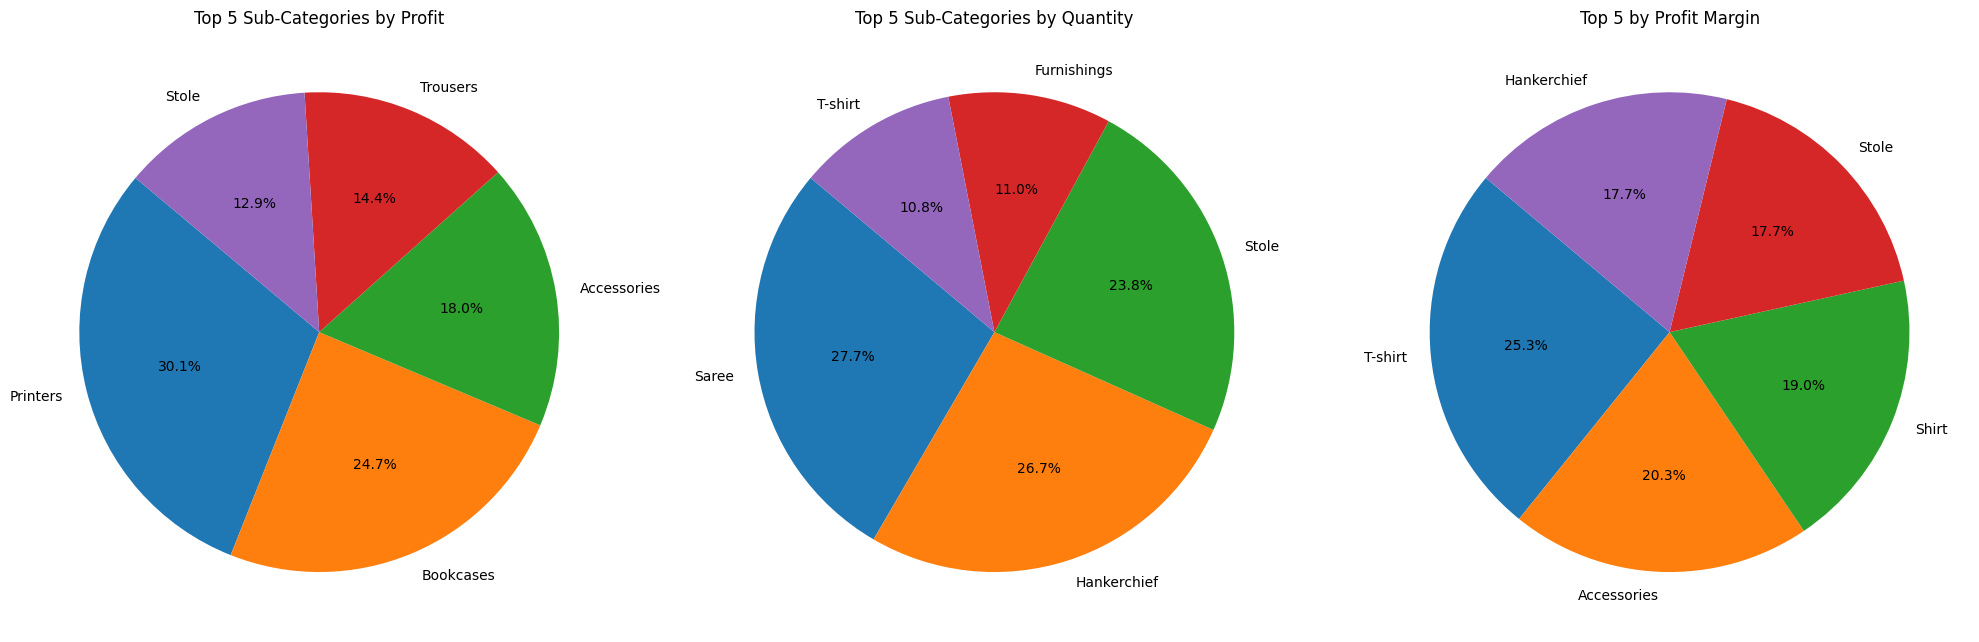

In [74]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(20, 7))

# ---------- 1. Profit Pie ----------
query = """
SELECT od."Sub-Category", SUM(od.Profit) AS TotalProfit
FROM order_details od
GROUP BY od."Sub-Category"
ORDER BY TotalProfit DESC
LIMIT 5;
"""
df_profit = pd.read_sql(query, conn)

axes[0].pie(df_profit["TotalProfit"], labels=df_profit["Sub-Category"], autopct="%1.1f%%", startangle=140)
axes[0].set_title("Top 5 Sub-Categories by Profit")

# ---------- 2. Quantity Pie ----------
query = """
SELECT od."Sub-Category", SUM(od.Quantity) AS TotalQuantity
FROM order_details od
GROUP BY od."Sub-Category"
ORDER BY TotalQuantity DESC
LIMIT 5;
"""
df_qty = pd.read_sql(query, conn)

axes[1].pie(df_qty["TotalQuantity"], labels=df_qty["Sub-Category"], autopct="%1.1f%%", startangle=140)
axes[1].set_title("Top 5 Sub-Categories by Quantity")

# ---------- 3. Profit Margin Pie ----------
query = """
SELECT od."Sub-Category",
       SUM(od.Amount) AS TotalRevenue,
       SUM(od.Profit) AS TotalProfit,
       ROUND(SUM(od.Profit)*1.0 / SUM(od.Amount), 2) AS ProfitMargin
FROM order_details od
GROUP BY od."Sub-Category"
ORDER BY ProfitMargin DESC
LIMIT 5;
"""
df_margin = pd.read_sql(query, conn)

axes[2].pie(df_margin["ProfitMargin"], labels=df_margin["Sub-Category"], autopct="%1.1f%%", startangle=140)
axes[2].set_title("Top 5 by Profit Margin")

plt.tight_layout()
plt.show()
